## Splitwise Analyser

### Importing Libraries

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data

In [2]:
expenseData = pd.read_csv("csk_2020-11-15_export.csv")

### Filtering Data For Required Date Range  

In [3]:
dateStart = "2020-11-01"
dateEnd = "2020-11-31"

curMonthData = expenseData[(expenseData["Date"] >= dateStart) &(expenseData["Date"] <= dateEnd) \
                           & (expenseData["Description"]!= "Total balance" )]
curMonthData = curMonthData.reset_index()
curMonthData = curMonthData.drop('index', 1)

In [4]:
defaultColumnNames = ['Date', 'Description', 'Category', 'Cost', 'Currency']
userNames = [each for each in curMonthData.columns if each not in defaultColumnNames]

In [5]:
CostColName = "Cost"
def costRecalculator(row):
    for each in userNames:
        if(row[each] <= 0):
            row[each] = abs(row[each])
        else:
            row[each] = float(row[CostColName]) - row[each]
    return row
curMonthExpenseData = curMonthData.apply(costRecalculator,axis=1)
curMonthExpenseData = pd.melt(curMonthExpenseData, id_vars=defaultColumnNames,var_name='User')
curMonthExpenseData.rename(columns={"value": "Expense"},inplace=True)

In [8]:
curMonthExpenseDataGrouped['Expense']

0    251.29
1    195.04
2    263.43
3    235.44
4    524.51
Name: Expense, dtype: float64

In [16]:
#Predefined Function to calculate the ticks and its name for various Axis's
#Based on the min and max values of the array given
def findAxisCordinatesAndNamesForTicks(Values = [],formatValue = 1,divisions = 20,overallMin = -1,overallMax=-1):
    if(overallMin == -1):
        overallMin = Values.agg('min')
    if(overallMax == -1):
        overallMax = Values.agg('max')
    #Finding the y axis label
    axis = []
    axisVariableNames = []
    i = int(overallMin)
    diff = (overallMax - overallMin)/divisions
    if(diff > (int(diff)+ 0.5)):
        diff = int(diff + 1)
    elif(diff > 1):
        diff = int(diff)
    diff = round(diff,2)
    while(i < overallMax + diff):
        i = round(i,2)
        axis.append(i)
        if(formatValue != 1):
            axisVariableNames.append(str(i/formatValue))
        else : 
            axisVariableNames.append(str(i))
        i += diff
    return [axis,axisVariableNames]

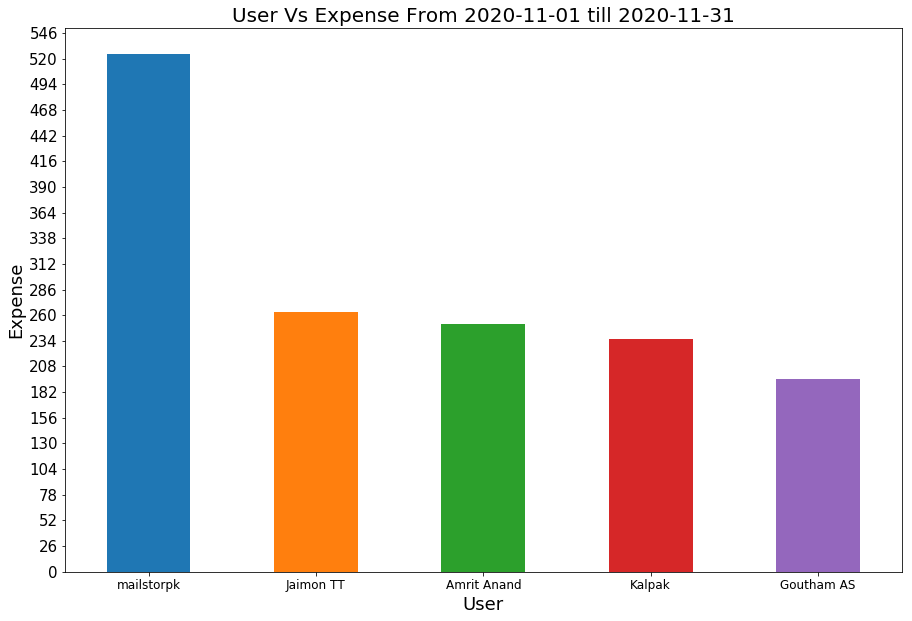

In [37]:
curMonthExpenseDataGrouped = curMonthExpenseData.groupby(['User'])['Expense'].agg('sum').reset_index()
causeGrouped = curMonthExpenseDataGrouped.sort_values(by=['Expense'],ascending =False)

#Finding the y axis label
yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(curMonthExpenseDataGrouped.Expense,overallMin = 0.0)

causeGrouped.plot.bar(x='User',y='Expense',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Expense',fontsize=18)
plt.xticks(rotation = 0)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)
plt.xlabel('User',fontsize=18)
plt.title("User Vs Expense From "+dateStart+" till "+dateEnd,fontsize=20)
plt.savefig('overall.png')
plt.show()

In [7]:
curMonthExpenseDataGrouped

,User,Expense
0,Amrit Anand,251.29
1,Goutham AS,187.39
2,Jaimon TT,255.77
3,Kalpak,235.44
4,mailstorpk,524.52


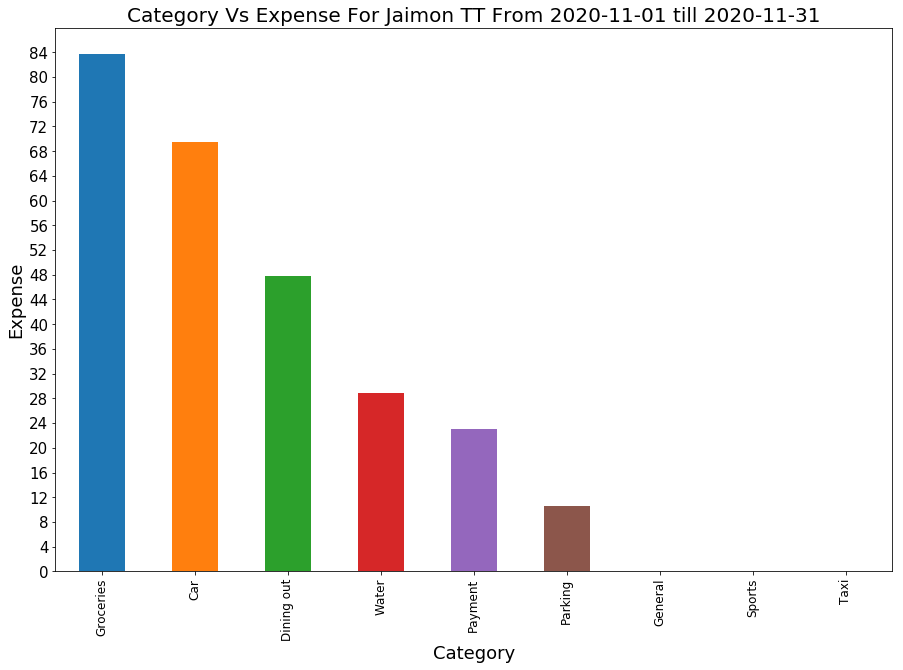

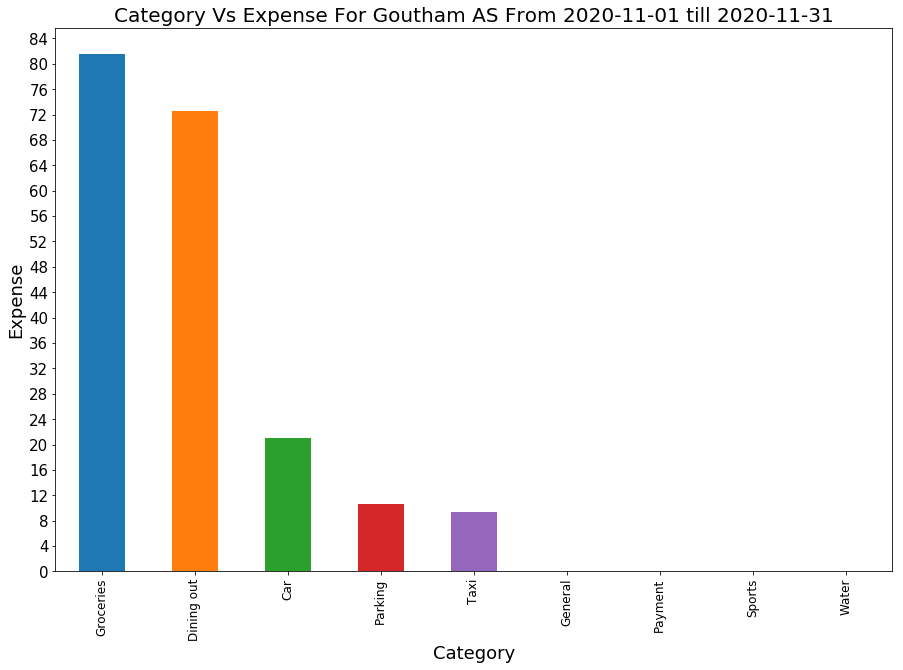

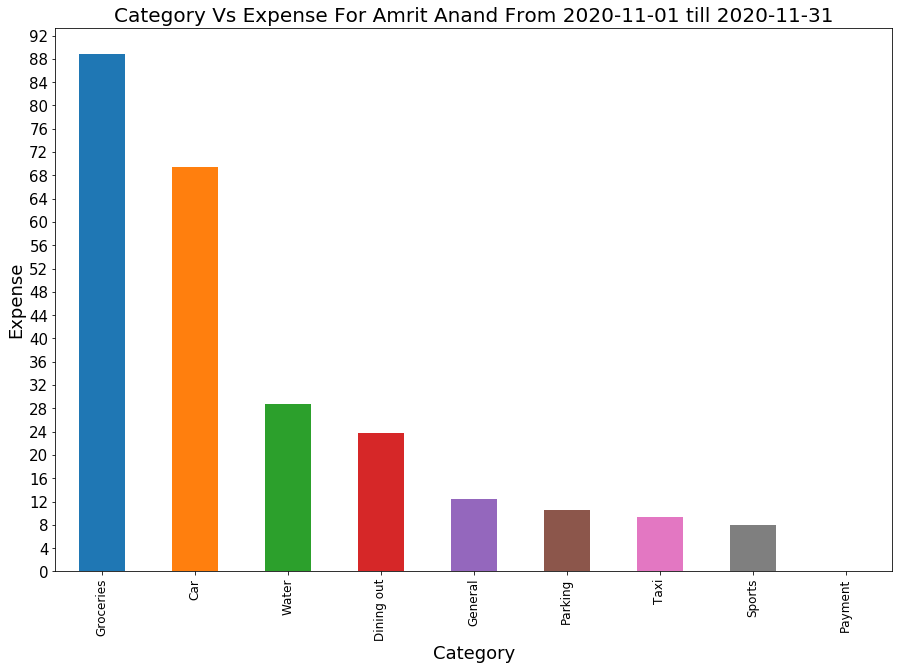

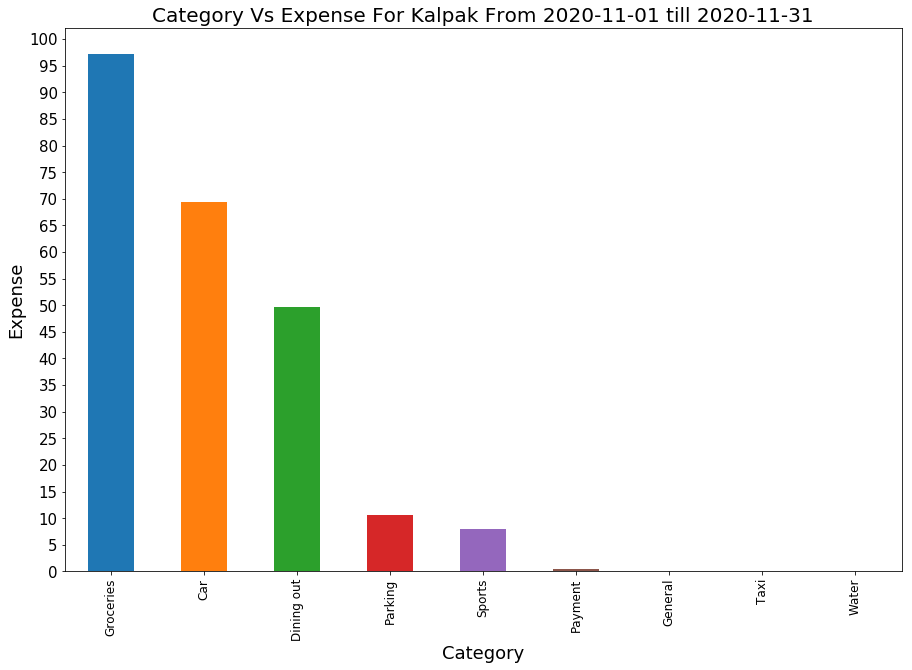

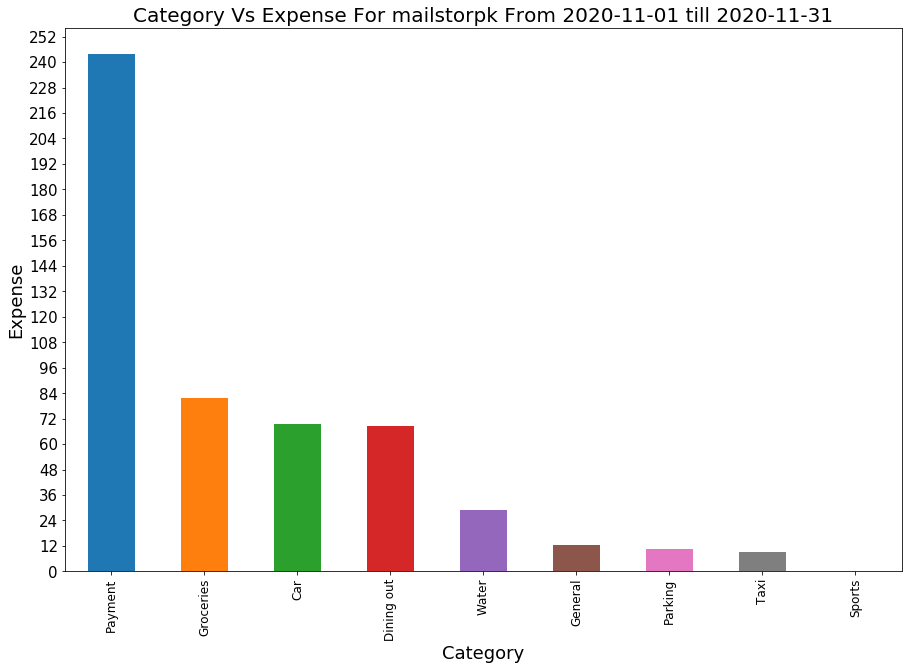

In [39]:
for each in userNames:
    CurrentUserData = curMonthExpenseData[curMonthExpenseData['User'] == each]
    tempData = CurrentUserData.groupby(['Category'])['Expense'].agg('sum').reset_index()
    causeGrouped = tempData.sort_values(by=['Expense'],ascending =False)
    
    #Finding the y axis label
    yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(causeGrouped.Expense,overallMin = 0.0)
    
    causeGrouped.plot.bar(x='Category',y='Expense',figsize=(15, 10),fontsize=12,legend=None)
    plt.ylabel('Expense',fontsize=18)
    plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)
    plt.xlabel('Category',fontsize=18)
    plt.title("Category Vs Expense For "+each+" From "+dateStart+" till "+dateEnd,fontsize=20)
    plt.savefig("Category Wise Report for "+each+".png")
    plt.show()

In [9]:
curMonthExpenseData[curMonthExpenseData['User'] == 'mailstorpk']

,Date,Description,Category,Cost,Currency,User,Expense
212,2020-11-01,Goget fine,General,88.73,AUD,mailstorpk,22.19
213,2020-11-01,Fish,General,19.60,AUD,mailstorpk,3.92
214,2020-11-01,Uber,Taxi,28.00,AUD,mailstorpk,9.33
215,2020-11-01,Rego,General,189.00,AUD,mailstorpk,47.25
216,2020-11-01,Rego,General,21.00,AUD,mailstorpk,0.00
217,2020-11-01,Derby,General,27.00,AUD,mailstorpk,13.50
218,2020-11-01,Woolworths 31st,General,7.50,AUD,mailstorpk,1.50
219,2020-11-01,Woolworths chicken,Groceries,11.36,AUD,mailstorpk,2.84
220,2020-11-01,Woolworths,General,12.00,AUD,mailstorpk,2.40
221,2020-11-02,Yogurt kubbus,Groceries,6.50,AUD,mailstorpk,0.00
